## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB

## Dataset

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Checking the count of passengers in each class.
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
#Checking the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Lets drop few columns which are not necessary for our analysis.

In [7]:
df.drop(['Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch', 'Embarked', 'Cabin'], axis = 1, inplace = True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


- The above dataset contains a mix of numerical and categorical features. Lets do dummy encoding for 'Sex' column. But before that we shall check the null values in each column and also check the summary statistics.

### Checking Null Values

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [10]:
# In Age column we have null values, we shall replace those with the median value after checking the distribution.

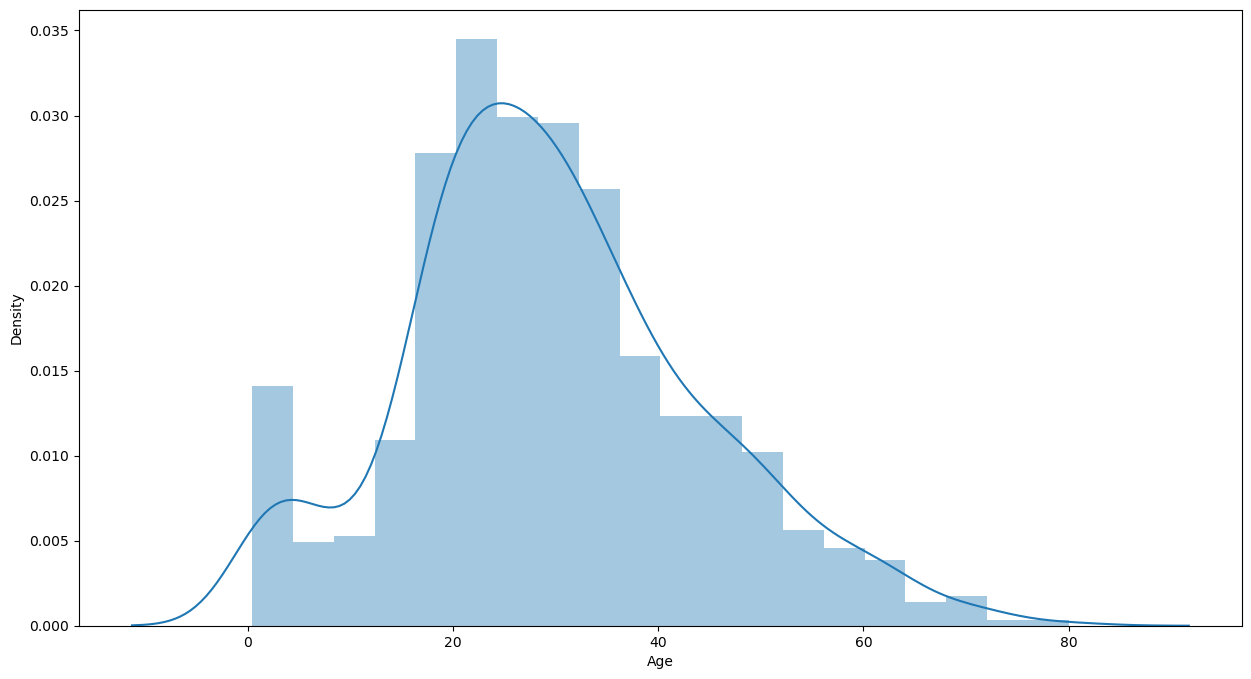

In [11]:
# We can replace with the mean or median value since it is following a Normal distribution.
sns.distplot(df['Age']);

In [12]:
df['Age'].median()

28.0

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].head(2)

0    22.0
1    38.0
Name: Age, dtype: float64

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [15]:
#Null values are successfully removed.

### Summary Statistics

In [16]:
df_num = df.select_dtypes(include = [np.number])
df_num.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [17]:
df_cat = df.select_dtypes(include = 'O')
df_cat.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [18]:
df_num.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [19]:
# Survived is the target column and other than that the dataset looks fine.

In [20]:
df_cat.describe()

,Sex
count,891
unique,2
top,male
freq,577


In [21]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


In [22]:
# there are more males than the females in the dataset.

In [23]:
df_feat = df.drop('Survived', axis =1)

In [24]:
df_feat.head(2)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833


In [25]:
y = df['Survived']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

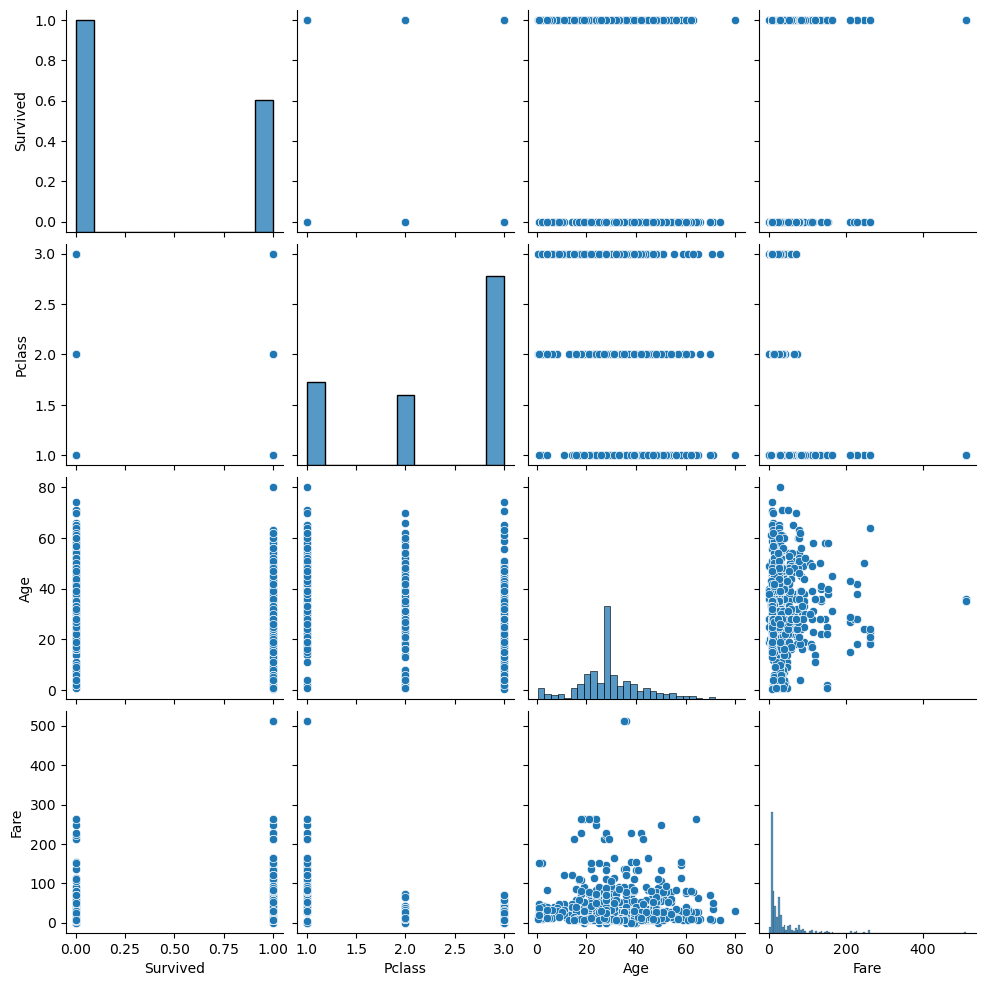

In [26]:
sns.pairplot(df);

### Correlation Matrix

In [27]:
df.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.338481,-0.064910,0.257307
Pclass,-0.338481,1.000000,-0.339898,-0.549500
Age,-0.064910,-0.339898,1.000000,0.096688
Fare,0.257307,-0.549500,0.096688,1.000000


<Axes: >

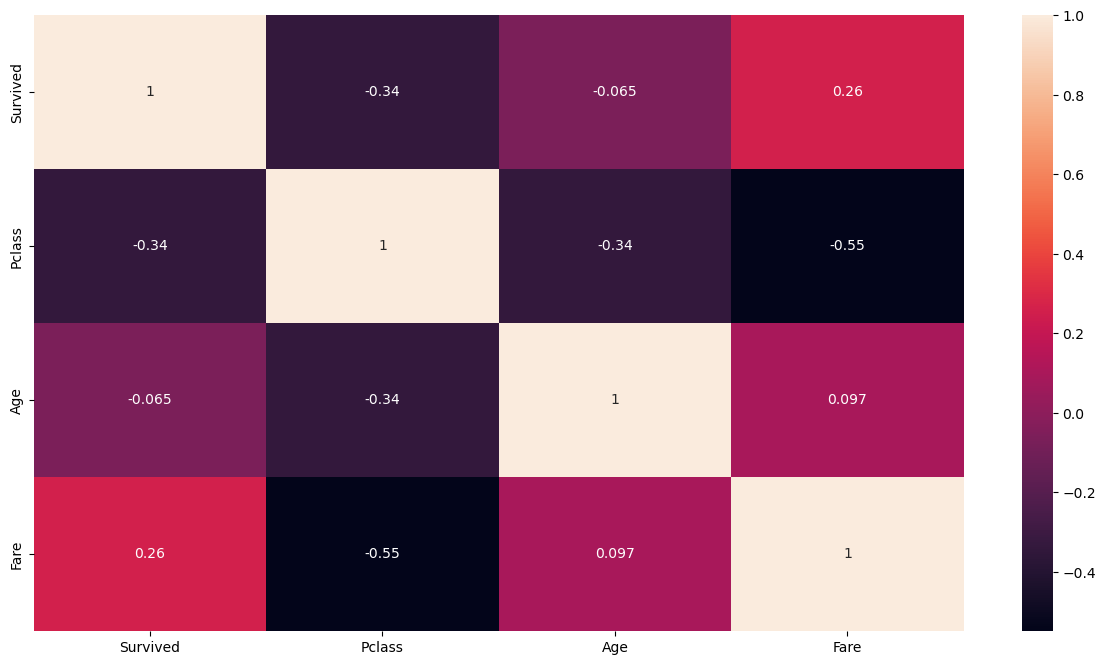

In [28]:
sns.heatmap(df.corr(), annot = True)

In [29]:
# No Correlation.

### Target Column distribution

In [30]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

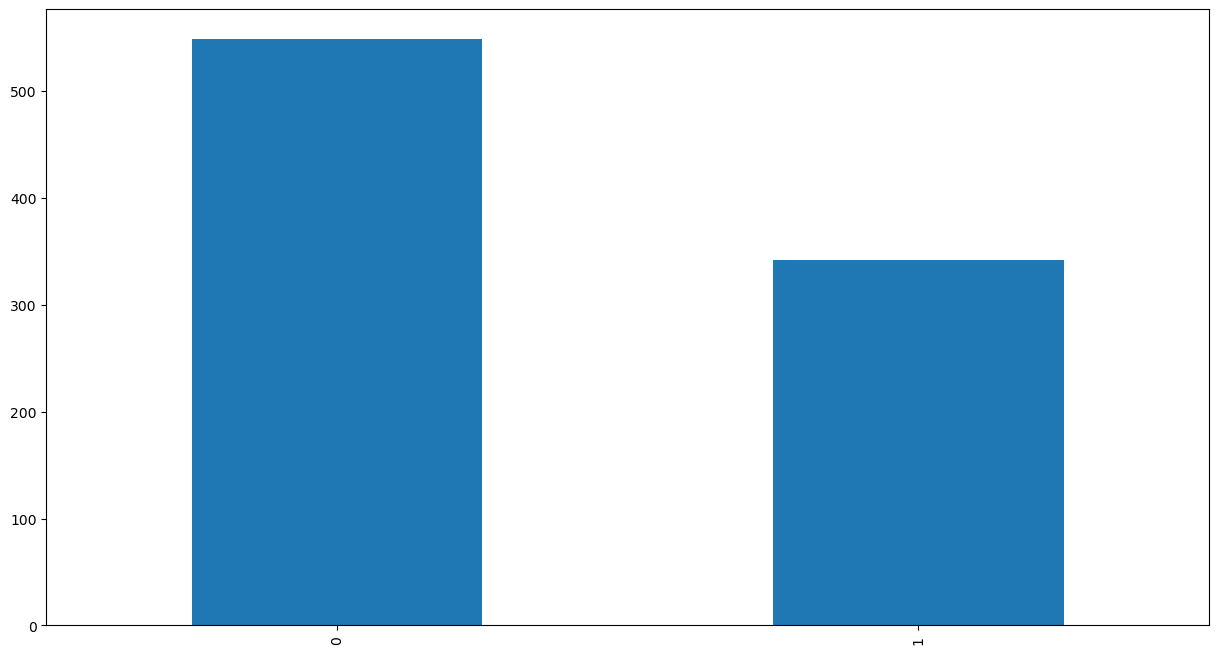

In [31]:
df['Survived'].value_counts().plot(kind = 'bar')
plt.show()

### Categorical column

In [32]:
dummy = pd.get_dummies(df_cat, drop_first=True)
dummy.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [33]:
df_features = pd.concat([df_feat, dummy], axis =1)
df_features.head(2)

,Pclass,Sex,Age,Fare,Sex_male
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0


In [34]:
# Lets drop the 'Sex column'
df_features.drop('Sex', axis =1, inplace = True)

In [35]:
X = df_features.copy()
X.head(2)

,Pclass,Age,Fare,Sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0


In [36]:
#Lets split the data in training and test data.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (712, 4)
X_test shape (179, 4)
y_train shape (712,)
y_test shape (179,)


### Model Building

In [39]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [40]:
#Training score
model.score(X_train, y_train)

0.7808988764044944

In [41]:
# Test score
model.score(X_test, y_test)

0.7597765363128491

In [42]:
# Not a very good score but we can see the model is not overfitting.

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

### Confusion Matrix

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[83, 22],
       [21, 53]])

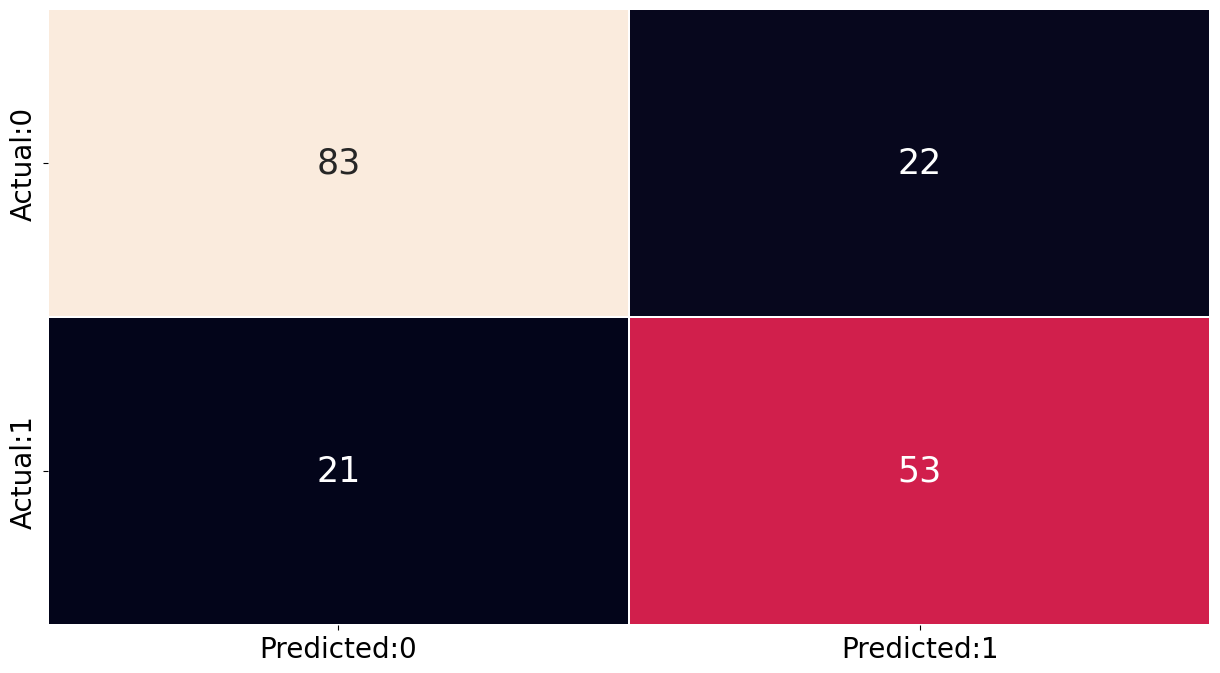

In [46]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### Classification Report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



`Inference:`

- We have achieved a 76% accuracy score which is a kind of a good model.
- In Confusion matrix, we can see there are many missclassified values.
- Almost the same number of False positives and False negatives.

In [48]:
X_test[:10]

,Pclass,Age,Fare,Sex_male
709,3,28.0,15.2458,1
439,2,31.0,10.5000,1
840,3,20.0,7.9250,1
720,2,6.0,33.0000,0
39,3,14.0,11.2417,0
290,1,26.0,78.8500,0
300,3,28.0,7.7500,0
333,3,16.0,18.0000,1
208,3,16.0,7.7500,0
136,1,19.0,26.2833,0


In [49]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [50]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [51]:
# We can see that the first value has been misclassified.

### Taking some random Explanatory Data Variables

In [52]:
X_train.head()

,Pclass,Age,Fare,Sex_male
331,1,45.5,28.5000,1
733,2,23.0,13.0000,1
382,3,32.0,7.9250,1
704,3,26.0,7.8542,1
813,3,6.0,31.2750,0


In [53]:
#Taking some random values.

In [54]:
df_values = pd.DataFrame({
    'Pclass': [1,1,2,3],
    'Age': [26, 30,32, 36],
    'Fare': [14, 18, 22, 24],
    'Sex_male': [0, 1,0, 1],
})

In [56]:
X_new = df_values.values
predicted_values = model.predict(X_new)
print("Predicted values:", predicted_values)

Predicted values: [1 0 1 0]
